# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

https://www.kaggle.com/datasets/missionjee/car-sales-report

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
car_df = pd.read_csv("car_sales.csv", delimiter=",")
display(car_df)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [3]:
print("Jumlah baris: ", car_df.shape[0])
print("Jumlah kolom: ", car_df.shape[1])

Jumlah baris:  23906
Jumlah kolom:  16


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
missing_values = car_df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
num_missing_columns = (missing_values > 0).sum()
print("Jumlah missing values:", num_missing_columns)
print(missing_columns)

print("\nJumlah duplikasi data:", car_df.duplicated().sum())

Jumlah missing values: 1
Customer Name    1
dtype: int64

Jumlah duplikasi data: 0


In [6]:
numerical_features = car_df.select_dtypes(include='number').columns.to_list()
categorical_features = car_df.select_dtypes(include='object').columns.to_list()

print("Jumlah fitur numerik :", len(numerical_features))
print("Jumlah fitur kategorik :", len(categorical_features))

Jumlah fitur numerik : 3
Jumlah fitur kategorik : 13


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,23906.0,8.308403e+05,720006.395388,10080.0,386000.0,735000.0,1175750.00,11200000.0
Price ($),23906.0,2.809025e+04,14788.687608,1200.0,18001.0,23000.0,34000.00,85800.0
Phone,23906.0,7.497741e+06,867491.995669,6000101.0,6746495.0,7496197.5,8248146.25,8999579.0


In [8]:
car_df.describe(include='object').T

,count,unique,top,freq
Car_id,23906,23906,C_CND_023906,1
Date,23906,612,9/5/2023,190
Customer Name,23905,3021,Thomas,92
Gender,23906,2,Male,18798
Dealer_Name,23906,28,Progressive Shippers Cooperative Association No,1318
Company,23906,30,Chevrolet,1819
Model,23906,154,Diamante,418
Engine,23906,2,DoubleÂ Overhead Camshaft,12571
Transmission,23906,2,Auto,12571
Color,23906,3,Pale White,11256


Distribution of Numerical Features


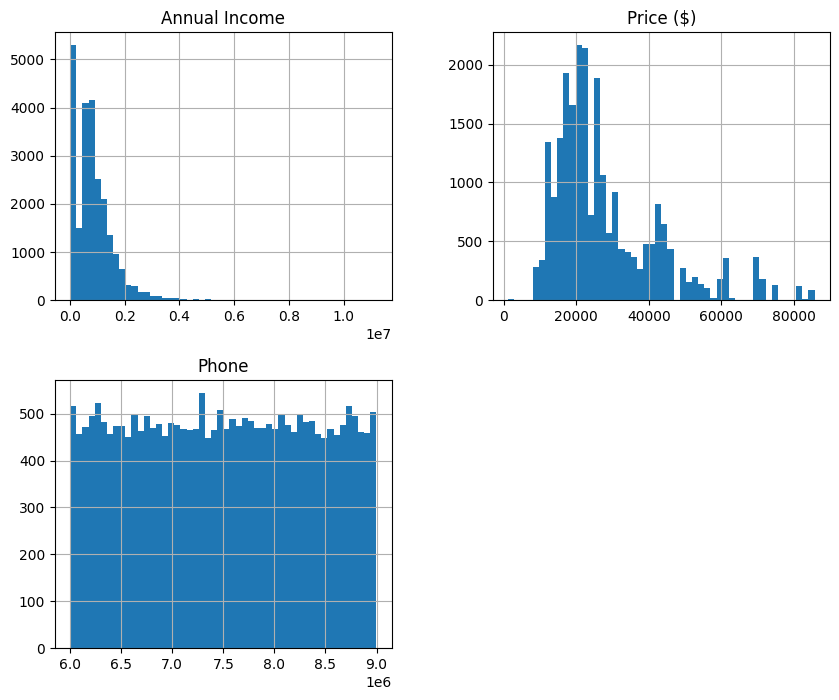

In [9]:
print("Distribution of Numerical Features")
car_df.hist(bins=50, figsize=(10,8))
plt.show()

Distribution of Categorical Features


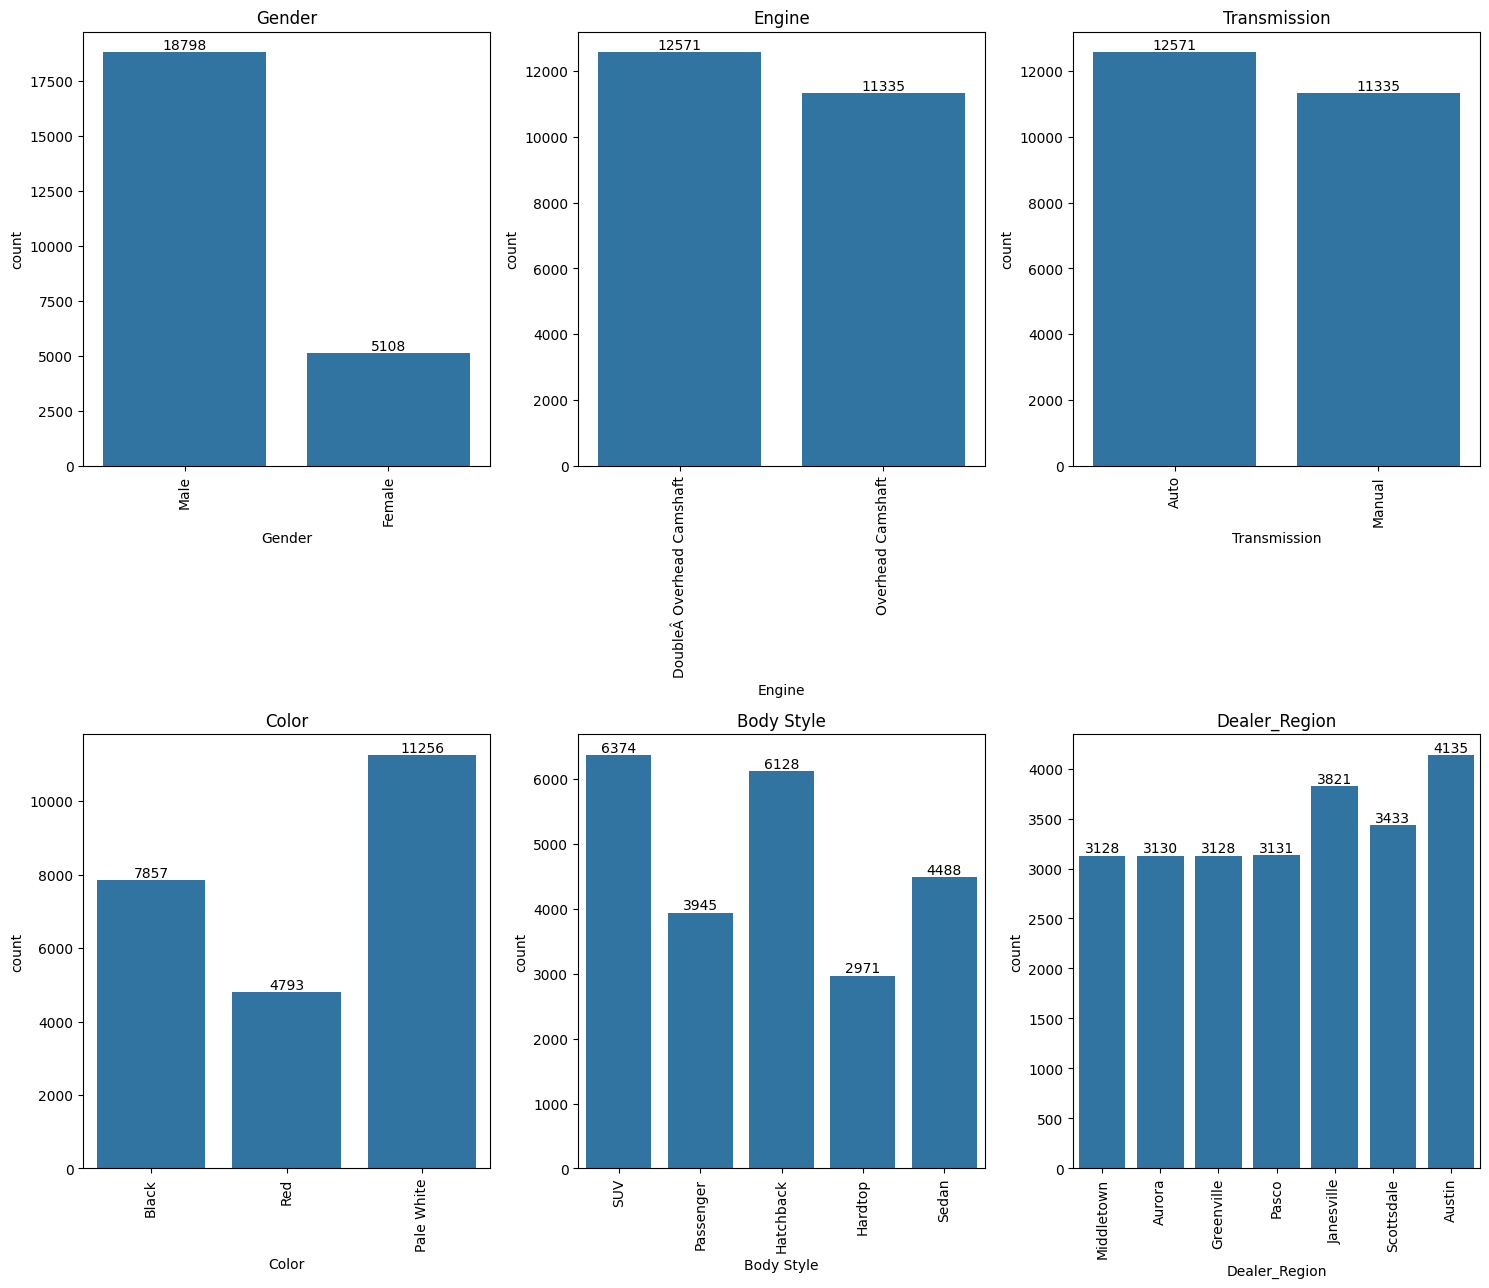

In [10]:
print("Distribution of Categorical Features")

# Mengambil sebagian kolom categorical_columns karena terlalu banyak
select_categorical_features = ['Gender', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']

plt.figure(figsize=(15, 40))

for i, col in enumerate(select_categorical_features, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(data=car_df, x=col)
    plt.title(f'{col}')
    plt.xticks(rotation=90)

    # Menambahkan angka di atas setiap batang
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
                int(p.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Average Numerical Features of Based on Gender


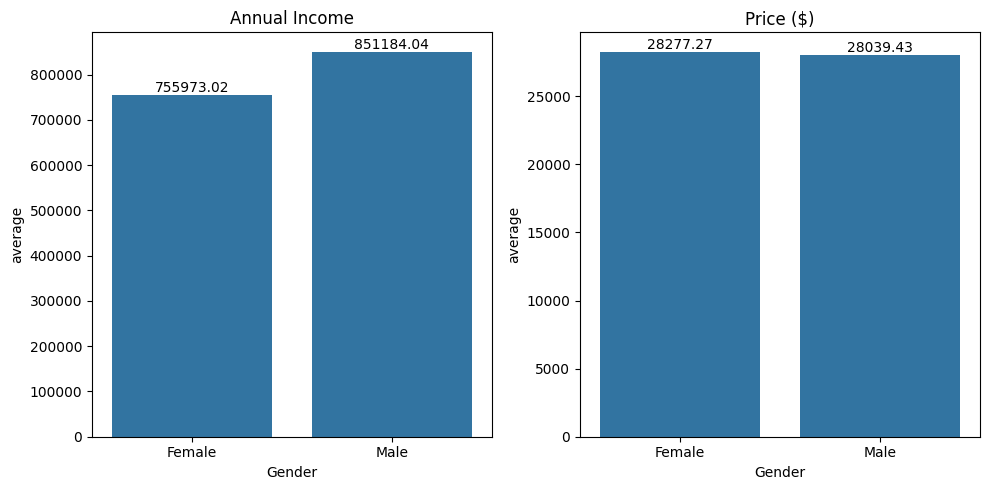

In [11]:
print("Average Numerical Features of Based on Gender")

# Mengambil kolom Annual Income dan Price ($) pada numerical_features
select_numerical_features = ['Annual Income', 'Price ($)']

num_cols = 2
num_rows = int(np.ceil(len(select_numerical_features) / num_cols))

plt.figure(figsize=(10, 5 * num_rows))

# Mengambil kolom selain 'Status'
valid_features = [col for col in select_numerical_features if col != 'Gender']

for i, col in enumerate(valid_features, 1):
    plt.subplot(num_rows, num_cols, i)

    average_gender = car_df.groupby('Gender')[col].mean().reset_index()
    ax = sns.barplot(data=average_gender, x='Gender', y=col)
    plt.title(f'{col}')
    plt.xlabel('Gender')
    plt.ylabel('average')

    # Menambahkan angka di atas setiap batang
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Distribution of Categorical Features Based on Gender


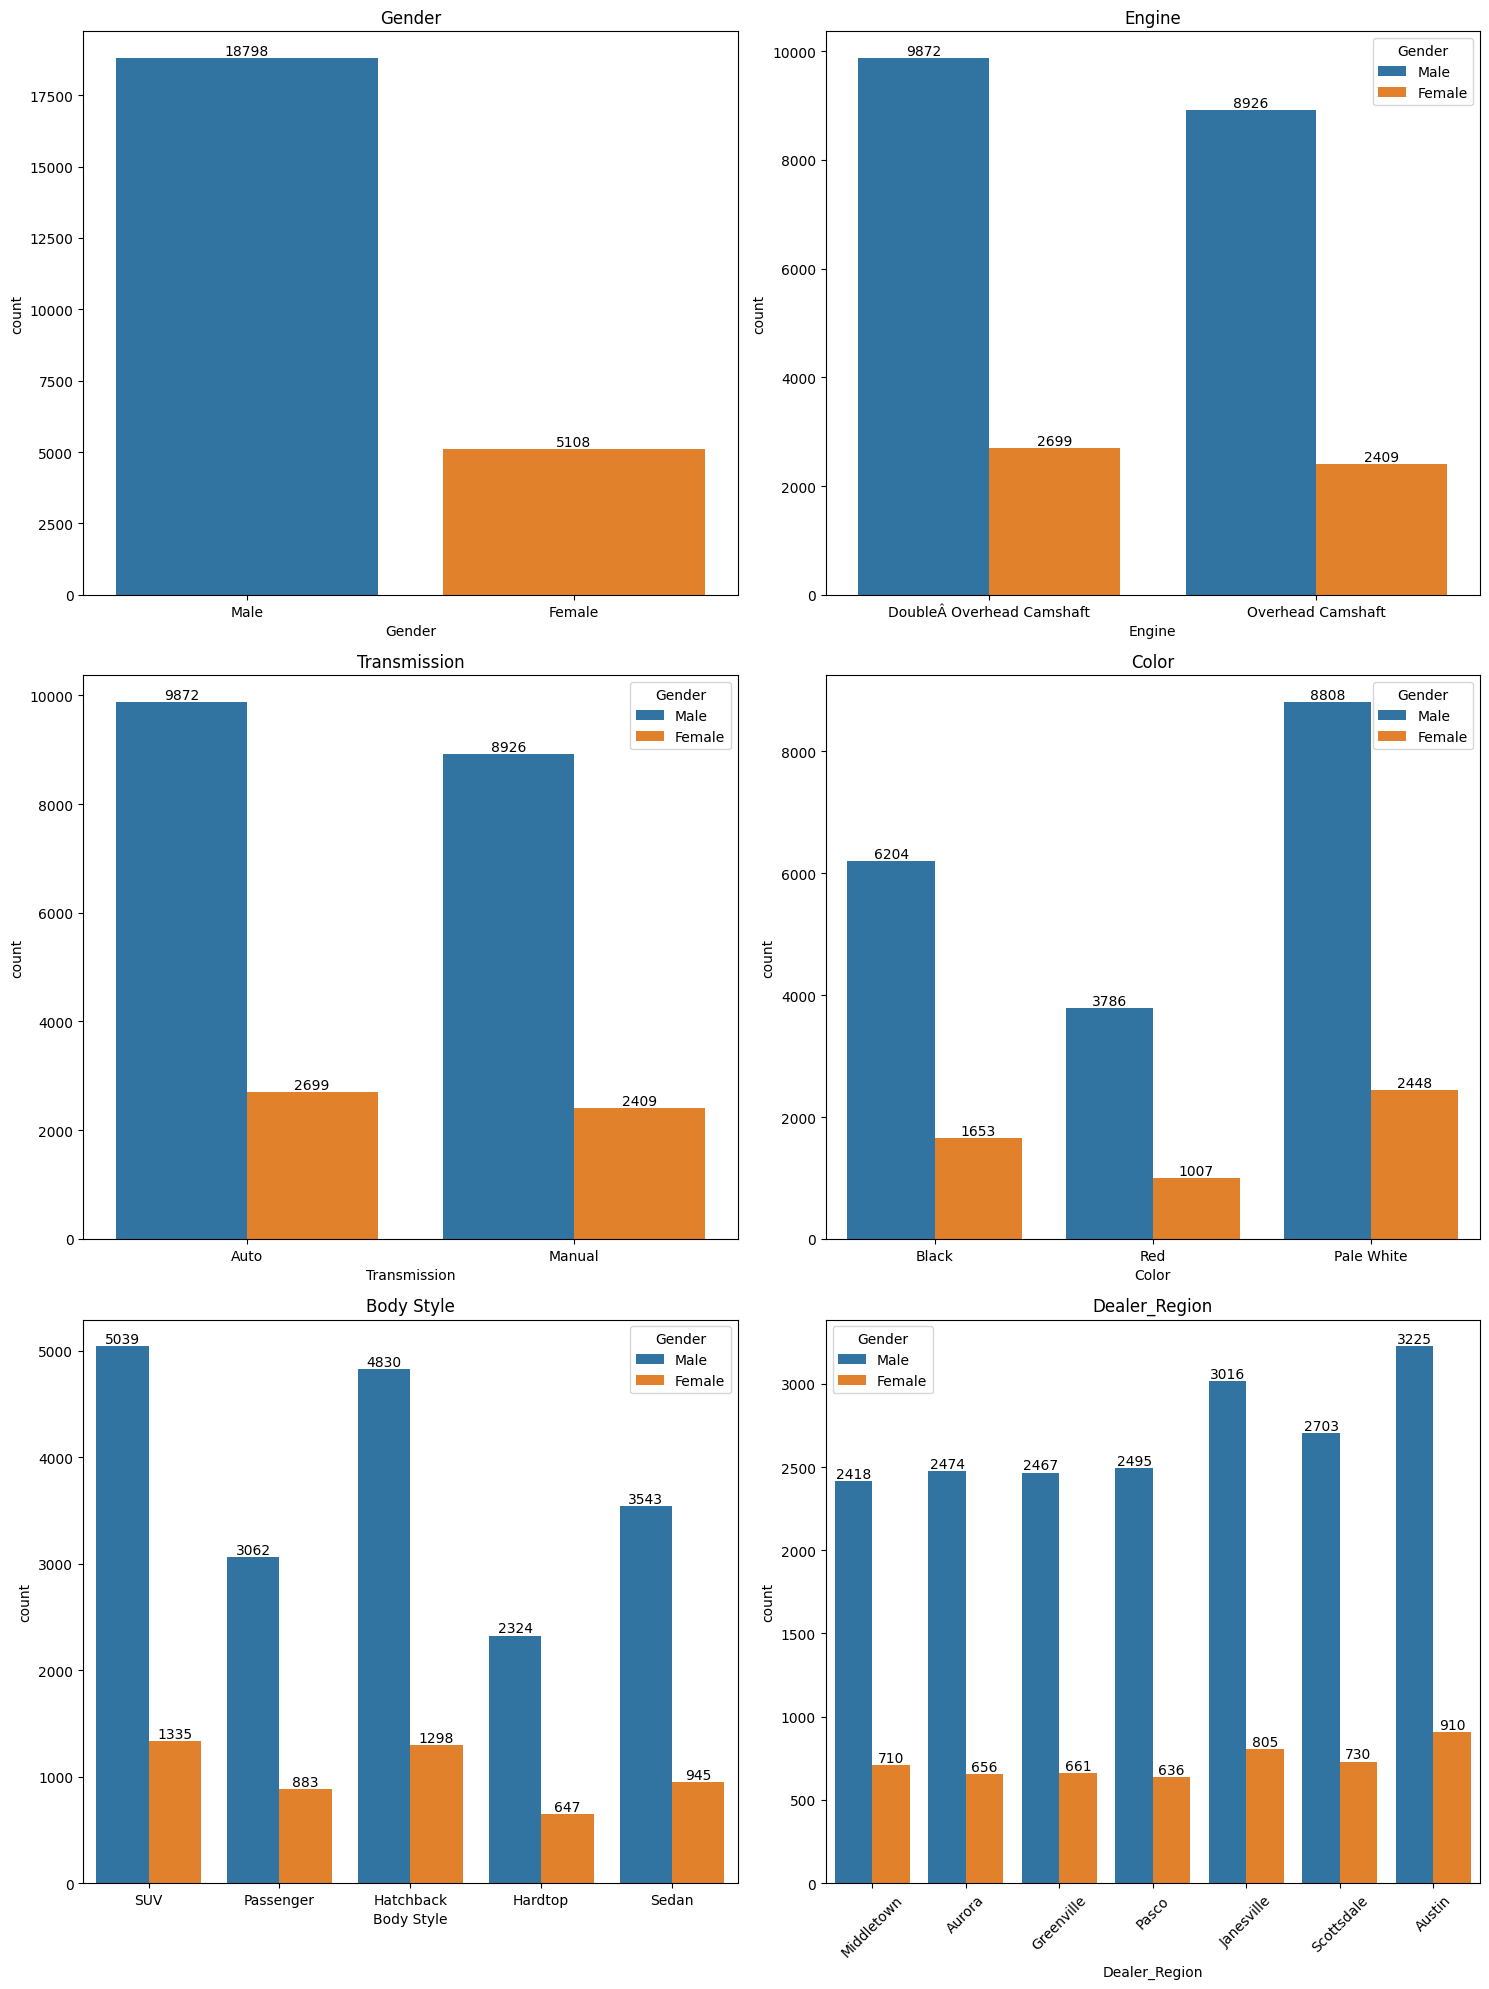

In [12]:
print("Distribution of Categorical Features Based on Gender")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(select_categorical_features):
    if i < len(axes):
        ax = sns.countplot(data=car_df, x=col, hue='Gender', ax=axes[i])
        ax.set_title(f'{col}')
        plt.xticks(rotation=45)

        # Menambahkan angka di atas setiap batang
        for p in ax.patches:
            if p.get_height() > 0:
                ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
                        int(p.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
car_df['Customer Name'] = car_df['Customer Name'].fillna('Unknown')

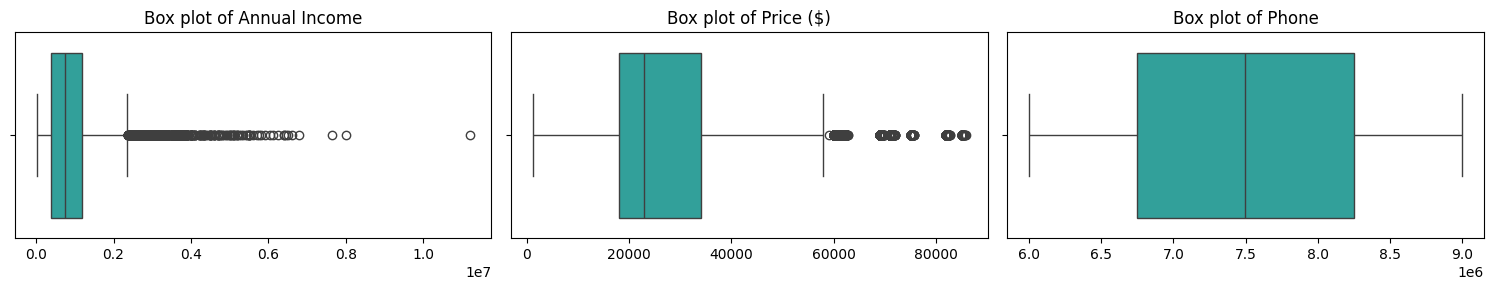

In [14]:
numerical_features = car_df.select_dtypes(include='number').columns.to_list()

# Menampilkan boxplot outliers
n_cols = 4
n_rows = int(np.ceil(len(numerical_features) / n_cols))

# Ukuran figure
plt.figure(figsize=(20, 3))

# Looping untuk plotting
for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=car_df[col], color='lightseagreen')
    plt.title(f'Box plot of {col}')
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [15]:
# Menyalin dataframe agar data asli tidak rusak
outlier_df = car_df.copy()

# Mengambil kolom numerik
numerical_features = outlier_df.select_dtypes(include='number').columns.to_list()

# Loop tiap kolom numerik untuk hapus outlier
for col in numerical_features:
    Q1 = outlier_df[col].quantile(0.25)
    Q3 = outlier_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_df = outlier_df[(outlier_df[col] >= lower_bound) & (outlier_df[col] <= upper_bound)]

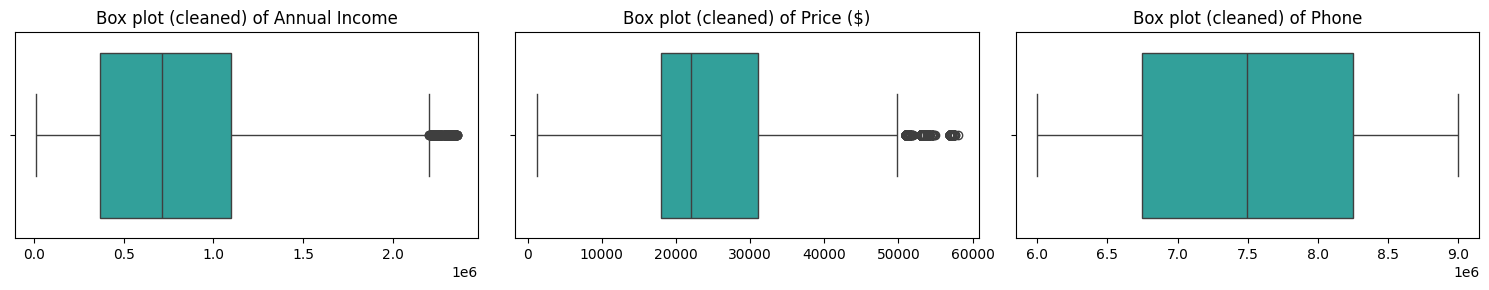

In [16]:
# Menampilkan boxplot outliers yang telah dibersihkan
n_cols = 4
n_rows = int(np.ceil(len(numerical_features) / n_cols))

# Ukuran figure
plt.figure(figsize=(20, 3))

# Loop untuk menampilkan boxplot tiap kolom
for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=outlier_df[col], color='lightseagreen')
    plt.title(f'Box plot (cleaned) of {col}')
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [17]:
# Timpa kembali data_df dengan data yang sudah dibersihkan
car_df = outlier_df
print(f"Jumlah data setelah menghapus outlier: {len(car_df)} baris")

Jumlah data setelah menghapus outlier: 21697 baris


In [18]:
car_df = car_df.drop(columns=['Car_id', 'Date', 'Customer Name','Dealer_No', 'Phone'])
car_df.head()

,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [19]:
car_df.rename(columns={'Gender':'gender', 'Annual Income':'annual_income_$','Dealer_Name':'dealer_name','Company':'company',
                       'Model':'model', 'Engine':'engine','Transmission':'transmission', 'Color':'color', 'Price ($)':'price_$',
                       'Body Style':'body_style', 'Dealer_Region':'dealer_region' },inplace=True)
car_df.head()

,gender,annual_income_$,dealer_name,company,model,engine,transmission,color,price_$,body_style,dealer_region
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [20]:
# Membagi data menjadi 3 kategori berdasarkan kuantil
car_df['annual_income_category'] = pd.qcut(car_df['annual_income_$'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
car_df['price_category'] = pd.qcut(car_df['price_$'], q=3, labels=['Cheap', 'Affrodable', 'Expensive'])

In [21]:
# Mengelompokkan kategori price berdasarkan gender
result = car_df.groupby(['gender','price_category']).size()
result.head()

/tmp/ipython-input-21-696281019.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = car_df.groupby(['gender','price_category']).size()


gender  price_category
Female  Cheap             1602
        Affrodable        1561
        Expensive         1500
Male    Cheap             5728
        Affrodable        5830
dtype: int64

In [22]:
# Mengelompokkan kategori annual income berdasarkan gender
result = car_df.groupby(['gender', 'annual_income_category'], observed=False).size()
result.head()

gender  annual_income_category
Female  Low                       1191
        Medium                    1447
        High                      1096
        Very High                  929
Male    Low                       4249
dtype: int64

In [23]:
#Melihat hasil binning
car_df.head()

,gender,annual_income_$,dealer_name,company,model,engine,transmission,color,price_$,body_style,dealer_region,annual_income_category,price_category
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,Low,Affrodable
1,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,Very High,Cheap
2,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,High,Expensive
3,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,Low,Cheap
4,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,Very High,Affrodable


In [24]:
# List kolom kategorikal yang akan di-encode
categorical_columns = ['gender', 'dealer_name','company', 'engine', 'model', 'transmission', 'color', 'body_style', 'dealer_region', 'annual_income_category','price_category']


# Menyimpan encoder untuk setiap kolom
label_encoders = {}

# Encode kolom kategorikal
for column in categorical_columns:
    le = LabelEncoder()
    car_df[column] = le.fit_transform(car_df[column])
    label_encoders[column] = le

car_df.head()

,gender,annual_income_$,dealer_name,company,model,engine,transmission,color,price_$,body_style,dealer_region,annual_income_category,price_category
0,1,13500,0,8,60,0,0,0,26000,3,4,1,0
1,1,1480000,1,7,52,0,0,0,19000,3,0,3,1
2,1,1035000,2,4,57,1,1,2,31500,2,2,0,2
3,1,13500,4,27,36,1,1,1,14000,3,5,1,1
4,1,1465000,3,0,141,0,0,2,24500,1,3,3,0


In [25]:
# Drop kolom target
X = car_df.drop(columns=['annual_income_category'])
y = car_df['annual_income_category']

# Inisialisasi SelectKBest dengan fungsi ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=8)

# Fit SelectKBest pada data
selector.fit(X, y)

# Lihat nama-nama fitur terbaiknya
selected_features = X.columns[selector.get_support()]
print("Fitur terbaik:", selected_features)

Fitur terbaik: Index(['gender', 'annual_income_$', 'transmission', 'color', 'price_$',
       'body_style', 'dealer_region', 'price_category'],
      dtype='object')


In [26]:
# Melihat data hasil feature selection
car_df = car_df[selected_features.to_list() + ['annual_income_category']]
car_df.head()

,gender,annual_income_$,transmission,color,price_$,body_style,dealer_region,price_category,annual_income_category
0,1,13500,0,0,26000,3,4,0,1
1,1,1480000,0,0,19000,3,0,1,3
2,1,1035000,1,2,31500,2,2,2,0
3,1,13500,1,1,14000,3,5,1,1
4,1,1465000,0,2,24500,1,3,0,3


In [27]:
# Menyimpan data hasil feature selection ke csv
car_df.to_csv('car_df_preprocessing.csv', index=False)

In [28]:
# Membagi dataset menjadi data latih dan uji
X = car_df.drop('annual_income_category', axis=1)
y = car_df['annual_income_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Menyimpan data latih dan uji ke csv
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [30]:
# Menyimpan label_encoders ke dalam file
joblib.dump(label_encoders, 'label_encoders.joblib')

['label_encoders.joblib']